In [2]:
import os, logging

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"
logging.getLogger("tensorflow").setLevel(logging.CRITICAL)
logging.getLogger("tensorflow_hub").setLevel(logging.CRITICAL)

import tensorflow as tf
import tensorflow_hub as hub

In [3]:
#import tensorflow as tf
import environment
import math
import numpy as np
import random
from collections import deque
import matplotlib.pyplot as plt

pygame 2.0.1 (SDL 2.0.14, Python 3.7.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [15]:
env = environment

n_episodes = 1000
n_win_ticks = 3000

gamma = 0.999
epsilon = 1.0
epsilon_min = 0.01
epsilon_decay = 0.995
alpha = 0.01  
alpha_decay = 0.01

batch_size = 500

memory = deque(maxlen = 15000)

SHOW_EVERY = 20
PLOT_EVERY = 20
show =  False

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Dense(24, input_dim = 11, activation = 'relu'))
model.add(Dense(48, activation = 'relu'))
model.add(Dense(3, activation = 'softmax'))
model.compile(loss = 'mse', optimizer = Adam(lr = alpha, decay = alpha_decay))

In [11]:
def save(state, action, reward, next_state, done):
    memory.append((state, action, reward, next_state, done))   
    
def choose_action(state, epsilon):
    if np.random.random() <= epsilon:
        return env.sample() 
    else: 
        return np.argmax(model.predict(state))

def get_epsilon(t):
    return max(epsilon_min, min(epsilon, 1.0 - math.log10((t+1)*epsilon_decay)))

def replay(batch_size, epsilon):
    
    x_batch, y_batch = [], []
    minibatch = random.sample(memory, min(len(memory), batch_size))
    
    for state, action, reward, next_state, done in minibatch:  
        
        y_target = model.predict(state)
        y_target[0][action] = reward if done else reward + gamma*np.max(model.predict(next_state)[0])
        x_batch.append(state[0])
        y_batch.append(y_target[0])
    
    model.fit(np.array(x_batch), np.array(y_batch), batch_size = len(x_batch), verbose = 0)
    
    if epsilon > epsilon_min:
        epsilon *= epsilon_decay

In [16]:
def run():
    ep = []
    ticks = []
    # make the environment
    env = environment
    env.reset()
    env.show = show
    # run the loop for n_episodes
    for e in range(n_episodes):
        # Reset the environment
        env.reset()
        done = False
        # First state
        state = env.get_state()
        # Reset the score counter
        i = 0
        # Run the loop - algorithm
        while not done:
            # get the action according the state.
            action = choose_action(state, epsilon)
            # Make the move
            env.step(action)
            # Get the next state from environment
            next_state = env.get_state()
            # Get the reward
            reward = env.get_reward()
            # Check if the programm has done
            done = env.done
            # Save the current situation
            save(state, action, reward, next_state, done)
            # Update the state
            state = next_state
            # Raise up the score
            i += 1
        
        print("Episode {} run for {} ticks".format(e, i))
        replay(batch_size, get_epsilon(e))
        
        ep.append(e)
        ticks.append(i)
        
        plt.plot(ep, ticks)
        if e % PLOT_EVERY == 0 and e > 1:
            plt.show()
        
        if show == True:
            if e % SHOW_EVERY == 0:
                env.show = True
            else:
                env.show = False

Episode 0 run for 33 ticks
Episode 1 run for 25 ticks
Episode 2 run for 38 ticks
Episode 3 run for 28 ticks
Episode 4 run for 37 ticks
Episode 5 run for 21 ticks
Episode 6 run for 37 ticks
Episode 7 run for 46 ticks
Episode 8 run for 21 ticks
Episode 9 run for 37 ticks
Episode 10 run for 27 ticks
Episode 11 run for 34 ticks
Episode 12 run for 35 ticks
Episode 13 run for 28 ticks
Episode 14 run for 26 ticks
Episode 15 run for 25 ticks
Episode 16 run for 25 ticks
Episode 17 run for 30 ticks
Episode 18 run for 29 ticks
Episode 19 run for 27 ticks
Episode 20 run for 27 ticks


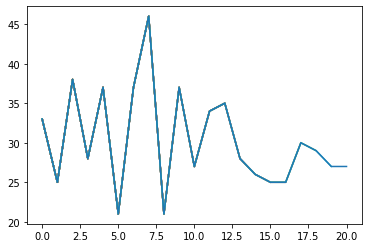

Episode 21 run for 27 ticks
Episode 22 run for 25 ticks
Episode 23 run for 27 ticks
Episode 24 run for 34 ticks
Episode 25 run for 38 ticks
Episode 26 run for 36 ticks
Episode 27 run for 30 ticks
Episode 28 run for 43 ticks
Episode 29 run for 36 ticks
Episode 30 run for 27 ticks
Episode 31 run for 30 ticks
Episode 32 run for 47 ticks
Episode 33 run for 33 ticks
Episode 34 run for 36 ticks
Episode 35 run for 31 ticks
Episode 36 run for 24 ticks
Episode 37 run for 46 ticks
Episode 38 run for 35 ticks
Episode 39 run for 41 ticks
Episode 40 run for 37 ticks


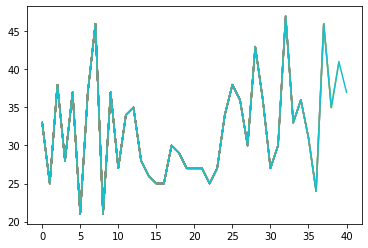

Episode 41 run for 33 ticks
Episode 42 run for 37 ticks
Episode 43 run for 31 ticks
Episode 44 run for 28 ticks
Episode 45 run for 37 ticks
Episode 46 run for 31 ticks
Episode 47 run for 22 ticks
Episode 48 run for 50 ticks
Episode 49 run for 27 ticks
Episode 50 run for 36 ticks
Episode 51 run for 38 ticks
Episode 52 run for 23 ticks
Episode 53 run for 42 ticks
Episode 54 run for 48 ticks
Episode 55 run for 51 ticks
Episode 56 run for 25 ticks
Episode 57 run for 23 ticks
Episode 58 run for 38 ticks
Episode 59 run for 27 ticks
Episode 60 run for 25 ticks


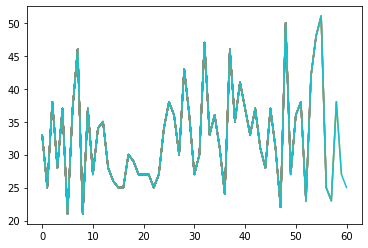

Episode 61 run for 46 ticks
Episode 62 run for 39 ticks
Episode 63 run for 24 ticks
Episode 64 run for 23 ticks
Episode 65 run for 36 ticks
Episode 66 run for 30 ticks
Episode 67 run for 29 ticks
Episode 68 run for 25 ticks
Episode 69 run for 29 ticks
Episode 70 run for 36 ticks
Episode 71 run for 29 ticks
Episode 72 run for 24 ticks
Episode 73 run for 27 ticks
Episode 74 run for 42 ticks
Episode 75 run for 26 ticks
Episode 76 run for 45 ticks
Episode 77 run for 35 ticks
Episode 78 run for 33 ticks
Episode 79 run for 40 ticks
Episode 80 run for 34 ticks


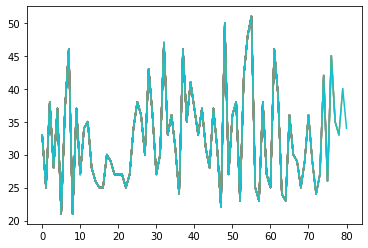

Episode 81 run for 31 ticks
Episode 82 run for 25 ticks
Episode 83 run for 29 ticks
Episode 84 run for 24 ticks
Episode 85 run for 27 ticks
Episode 86 run for 29 ticks
Episode 87 run for 35 ticks
Episode 88 run for 48 ticks
Episode 89 run for 29 ticks
Episode 90 run for 27 ticks
Episode 91 run for 29 ticks
Episode 92 run for 25 ticks
Episode 93 run for 34 ticks
Episode 94 run for 59 ticks
Episode 95 run for 43 ticks
Episode 96 run for 23 ticks
Episode 97 run for 36 ticks
Episode 98 run for 31 ticks
Episode 99 run for 33 ticks
Episode 100 run for 33 ticks


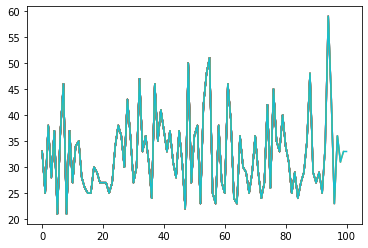

Episode 101 run for 24 ticks
Episode 102 run for 28 ticks
Episode 103 run for 34 ticks
Episode 104 run for 25 ticks
Episode 105 run for 33 ticks
Episode 106 run for 38 ticks
Episode 107 run for 49 ticks
Episode 108 run for 25 ticks
Episode 109 run for 28 ticks
Episode 110 run for 27 ticks
Episode 111 run for 32 ticks
Episode 112 run for 30 ticks
Episode 113 run for 22 ticks
Episode 114 run for 44 ticks
Episode 115 run for 22 ticks
Episode 116 run for 23 ticks
Episode 117 run for 39 ticks
Episode 118 run for 31 ticks
Episode 119 run for 33 ticks
Episode 120 run for 24 ticks


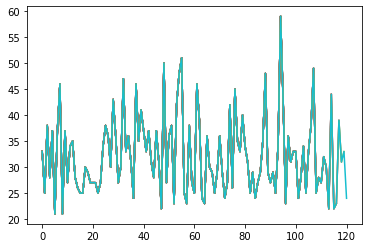

Episode 121 run for 35 ticks
Episode 122 run for 30 ticks
Episode 123 run for 33 ticks
Episode 124 run for 27 ticks
Episode 125 run for 23 ticks
Episode 126 run for 38 ticks
Episode 127 run for 21 ticks
Episode 128 run for 27 ticks
Episode 129 run for 28 ticks
Episode 130 run for 23 ticks
Episode 131 run for 31 ticks
Episode 132 run for 26 ticks
Episode 133 run for 22 ticks
Episode 134 run for 46 ticks
Episode 135 run for 37 ticks
Episode 136 run for 24 ticks
Episode 137 run for 22 ticks
Episode 138 run for 25 ticks
Episode 139 run for 29 ticks
Episode 140 run for 23 ticks


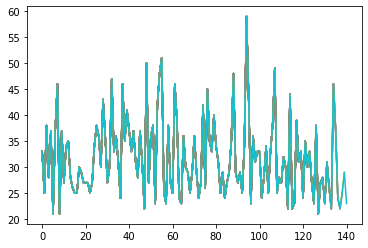

Episode 141 run for 48 ticks
Episode 142 run for 21 ticks
Episode 143 run for 28 ticks
Episode 144 run for 40 ticks
Episode 145 run for 31 ticks
Episode 146 run for 29 ticks
Episode 147 run for 46 ticks
Episode 148 run for 38 ticks
Episode 149 run for 21 ticks
Episode 150 run for 33 ticks
Episode 151 run for 28 ticks
Episode 152 run for 47 ticks
Episode 153 run for 26 ticks
Episode 154 run for 30 ticks
Episode 155 run for 41 ticks
Episode 156 run for 22 ticks
Episode 157 run for 27 ticks
Episode 158 run for 33 ticks
Episode 159 run for 38 ticks
Episode 160 run for 29 ticks


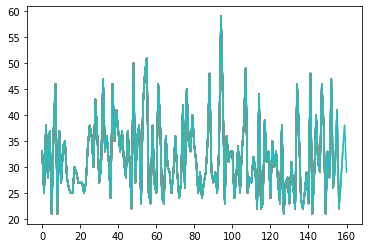

Episode 161 run for 20 ticks
Episode 162 run for 22 ticks
Episode 163 run for 29 ticks
Episode 164 run for 24 ticks
Episode 165 run for 28 ticks
Episode 166 run for 29 ticks
Episode 167 run for 48 ticks
Episode 168 run for 33 ticks
Episode 169 run for 42 ticks
Episode 170 run for 31 ticks
Episode 171 run for 23 ticks
Episode 172 run for 47 ticks
Episode 173 run for 35 ticks
Episode 174 run for 23 ticks
Episode 175 run for 22 ticks
Episode 176 run for 50 ticks
Episode 177 run for 33 ticks
Episode 178 run for 24 ticks
Episode 179 run for 26 ticks
Episode 180 run for 32 ticks


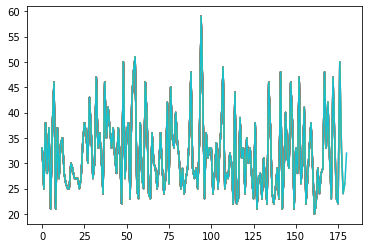

Episode 181 run for 37 ticks
Episode 182 run for 25 ticks
Episode 183 run for 25 ticks
Episode 184 run for 23 ticks
Episode 185 run for 41 ticks
Episode 186 run for 22 ticks
Episode 187 run for 25 ticks
Episode 188 run for 23 ticks
Episode 189 run for 26 ticks
Episode 190 run for 35 ticks
Episode 191 run for 24 ticks
Episode 192 run for 21 ticks
Episode 193 run for 37 ticks
Episode 194 run for 26 ticks
Episode 195 run for 22 ticks
Episode 196 run for 41 ticks
Episode 197 run for 23 ticks
Episode 198 run for 24 ticks
Episode 199 run for 26 ticks
Episode 200 run for 26 ticks


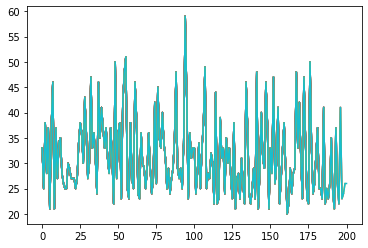

Episode 201 run for 28 ticks
Episode 202 run for 32 ticks
Episode 203 run for 24 ticks
Episode 204 run for 30 ticks
Episode 205 run for 24 ticks
Episode 206 run for 41 ticks
Episode 207 run for 26 ticks
Episode 208 run for 34 ticks
Episode 209 run for 28 ticks
Episode 210 run for 29 ticks
Episode 211 run for 38 ticks
Episode 212 run for 25 ticks
Episode 213 run for 28 ticks
Episode 214 run for 31 ticks
Episode 215 run for 22 ticks
Episode 216 run for 24 ticks
Episode 217 run for 29 ticks
Episode 218 run for 24 ticks
Episode 219 run for 40 ticks
Episode 220 run for 50 ticks


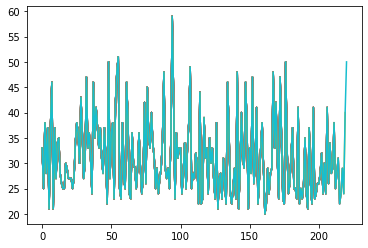

Episode 221 run for 29 ticks
Episode 222 run for 29 ticks
Episode 223 run for 33 ticks
Episode 224 run for 30 ticks
Episode 225 run for 20 ticks
Episode 226 run for 35 ticks
Episode 227 run for 28 ticks
Episode 228 run for 39 ticks
Episode 229 run for 41 ticks
Episode 230 run for 31 ticks


In [ ]:
run()

In [ ]:
model.save('model1.h5')
new_model = tf.keras.models.load_model('model1.h5')

In [7]:
#model = tensorflow.keras.models.load_model('model1.h5')
def test(model):
    i = 0
    for _ in range(10):
        env = environment
        env.show = True
        env.reset()
        done = False
        while not done:
            state = env.get_state()
            action = np.argmax(model.predict(state))
            env.step(action)
            done = env.done
            i += 1
        print("The total ticks was {}".format(i))

In [ ]:
test(model)